In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [60]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment (2).csv to CarPrice_Assignment (2) (1).csv


In [61]:
import io
data = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment (2).csv']))

In [62]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [63]:
data.shape

(205, 26)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [65]:
data.duplicated(subset = ['car_ID']).sum()

0

In [66]:
data = data.drop(['car_ID'], axis =1)

In [67]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [68]:
data['CarName'].value_counts()

toyota corolla       6
toyota corona        6
peugeot 504          6
subaru dl            4
mazda 626            3
                    ..
mitsubishi mirage    1
nissan kicks         1
porsche boxter       1
nissan note          1
mazda glc custom     1
Name: CarName, Length: 147, dtype: int64

In [69]:
data['Carcompany'] = data['CarName'].apply(lambda x:x.split(' ')[0])

In [70]:
data.Carcompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [71]:
data = data.drop(['CarName'], axis =1)

In [72]:
data['Carcompany'].replace('toyouta', 'toyota',inplace=True)
data['Carcompany'].replace('Nissan', 'nissan',inplace=True)
data['Carcompany'].replace('maxda', 'mazda',inplace=True)
data['Carcompany'].replace('vokswagen', 'volkswagen',inplace=True)
data['Carcompany'].replace('vw', 'volkswagen',inplace=True)
data['Carcompany'].replace('porcshce', 'porsche',inplace=True)

In [73]:
data['Carcompany'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: Carcompany, dtype: int64

In [74]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [75]:
data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [76]:
def number_(x):
    return x.map({'four':4, 'two': 2})
data['doornumber'] = data[['doornumber']].apply(number_)

In [77]:
data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [78]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [79]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

data['cylindernumber'] = data[['cylindernumber']].apply(convert_number)

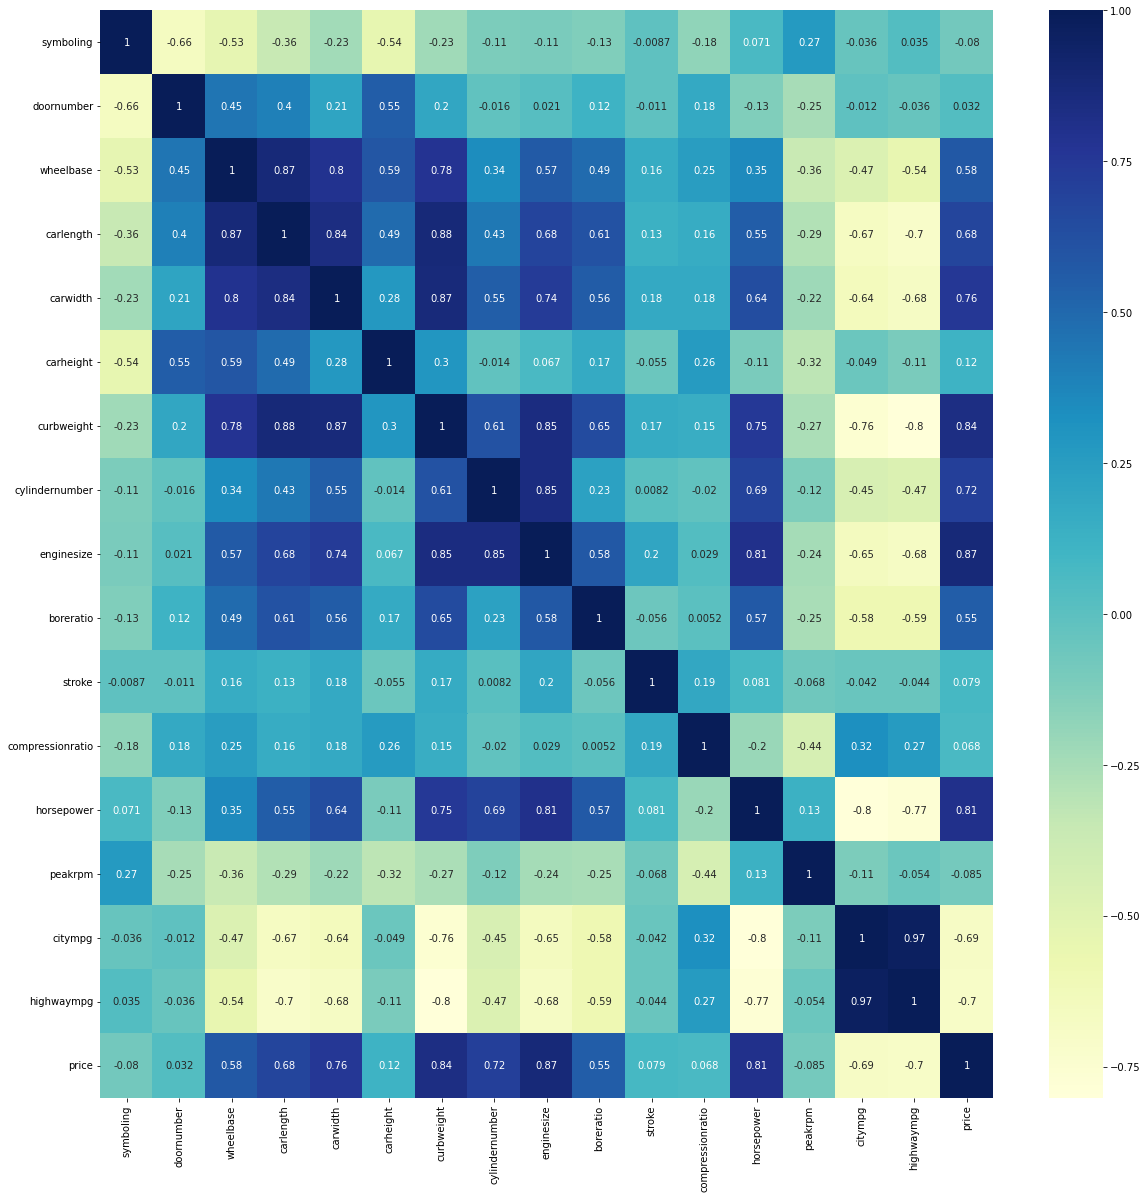

In [80]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [81]:
categorical_cols = data.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,Carcompany
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [82]:
#string_col=['car_company','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype']
data_dummies = pd.get_dummies(categorical_cols, drop_first = True)
data_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Carcompany_audi,Carcompany_bmw,Carcompany_buick,Carcompany_chevrolet,Carcompany_dodge,Carcompany_honda,Carcompany_isuzu,Carcompany_jaguar,Carcompany_mazda,Carcompany_mercury,Carcompany_mitsubishi,Carcompany_nissan,Carcompany_peugeot,Carcompany_plymouth,Carcompany_porsche,Carcompany_renault,Carcompany_saab,Carcompany_subaru,Carcompany_toyota,Carcompany_volkswagen,Carcompany_volvo
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
data_car  = pd.concat([data, data_dummies], axis =1)

In [84]:
data_car = data_car.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem','Carcompany'], axis =1)

In [85]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']
data_car[col_list] = data_car[col_list].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [86]:
X = data_car.iloc[:,:-1]
Y = data_car['price']

print("X")
print("")
print(X.head())
print("")
print("")
print("Y")
print(Y.head())

X

   symboling  doornumber  ...  Carcompany_toyota  Carcompany_volkswagen
0        1.0         0.0  ...                  0                      0
1        1.0         0.0  ...                  0                      0
2        0.6         0.0  ...                  0                      0
3        0.8         1.0  ...                  0                      0
4        0.8         1.0  ...                  0                      0

[5 rows x 59 columns]


Y
0    0.207959
1    0.282558
2    0.282558
3    0.219254
4    0.306142
Name: price, dtype: float64


In [87]:
X = np.array(X)
print(X[:5,:])
print("")
print(X.shape)

[[1.         0.         0.05830904 0.41343284 0.31666667 0.08333333
  0.41117145 0.2        0.26037736 0.66428571 0.29047619 0.125
  0.2625     0.34693878 0.22222222 0.28947368 0.20795889 1.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [1.         0.         0.05830904 0.41343284 0.31666667 0.08333333
  0.41117145 0.2        0.26037736 0.66428571 0.29047619 0.125
  0.2625     0.34693878 0.22222222 0.28947368 0.28255797 1.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.     

In [88]:
Y = np.array(Y)
print(Y.shape)


(205,)


In [89]:
Y = Y.reshape((205,1))
print(Y.shape)

(205, 1)


In [90]:
m=X.shape[0]
print("m:",m)

m: 205


In [91]:
o = np.ones((m,1))
X = np.hstack((o,X))
print(X.shape)
print("")
print(X[:5,:])

(205, 60)

[[1.         1.         0.         0.05830904 0.41343284 0.31666667
  0.08333333 0.41117145 0.2        0.26037736 0.66428571 0.29047619
  0.125      0.2625     0.34693878 0.22222222 0.28947368 0.20795889
  1.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.         1.         0.         0.05830904 0.41343284 0.31666667
  0.08333333 0.41117145 0.2        0.26037736 0.66428571 0.29047619
  0.125      0.2625     0.34693878 0.22222222 0.28947368 0.28255797
  1.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.      

In [140]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(164, 60)
(41, 60)
(164, 1)
(41, 1)


In [141]:
def h(x,theta):
	return np.dot(x, theta)

In [148]:
def Cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

In [149]:
def Gradient_descent(x, y, theta, learning_rate=0.1, epochs=10):
	m = x.shape[0]
	
	for _ in range(epochs):
		h_x = h(x, theta)
		cost = (1/m)*(x.T.dot(h_x - y))
		theta = theta - (learning_rate)*cost
		J= (Cost_function(x, y, theta))

	return theta, J 

In [150]:
theta = np.random.rand(X.shape[1], 1) * 0.01
learning_rate = 0.1
epochs = 10
theta, J = Gradient_descent(X_train, Y_train, theta, learning_rate, epochs)
print("Cost: ", J)
print("Parameters: ", theta)



Cost:  [[0.00776191]]
Parameters:  [[ 0.02723066]
 [ 0.01568769]
 [ 0.0072097 ]
 [ 0.02525068]
 [ 0.03141834]
 [ 0.02723802]
 [ 0.01884813]
 [ 0.0325811 ]
 [ 0.02181327]
 [ 0.03304165]
 [ 0.03174487]
 [ 0.01234331]
 [ 0.00745863]
 [ 0.02882309]
 [ 0.00742418]
 [-0.00144965]
 [-0.00286952]
 [ 0.03690301]
 [ 0.0129467 ]
 [ 0.01852171]
 [ 0.01611465]
 [-0.00621662]
 [ 0.01681046]
 [ 0.00765938]
 [-0.01874129]
 [ 0.053516  ]
 [ 0.00669254]
 [ 0.00949465]
 [ 0.00639327]
 [-0.00355568]
 [ 0.00388724]
 [ 0.01879071]
 [ 0.00049164]
 [-0.01663502]
 [ 0.00297667]
 [ 0.01268491]
 [ 0.00087415]
 [ 0.03901194]
 [ 0.00472721]
 [ 0.00887827]
 [ 0.00832689]
 [ 0.01414194]
 [ 0.0261227 ]
 [ 0.00817421]
 [ 0.00496867]
 [-0.00286477]
 [-0.00087772]
 [ 0.01197596]
 [ 0.00807999]
 [ 0.0057854 ]
 [ 0.00329927]
 [ 0.00162669]
 [ 0.0031849 ]
 [ 0.00143982]
 [ 0.01038691]
 [ 0.00502306]
 [ 0.00272107]
 [ 0.0003528 ]
 [-0.00505182]
 [ 0.00443893]]


In [123]:
Y_test_predict= np.dot(X_test,theta)
mse_test = np.square(np.subtract(Y_test,Y_test_predict)).mean()

print('MSE is',mse_test)


MSE is 0.0059029004356594295


**using sklearn to** **verify**

In [104]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [106]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [107]:
rmse_scores

array([3.12439018e-16, 6.21720549e-16, 4.99192024e-16, 6.95316519e-16,
       4.29780203e-16, 2.84217266e-16, 6.26023705e-16, 3.34842682e-05,
       8.71614599e-05, 5.05390071e-16])

In [108]:
y_pred=model.predict(X_test)

In [113]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mse

1.7697984589524407e-30

using sklearn technique for normal regression verification

In [114]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_test_predict)
mse

0.005942765829926756

evaluating the model

In [124]:
from sklearn.metrics import r2_score
r_sq = r2_score(Y_test,Y_test_predict)
r_sq

0.8597915969001411